## Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

import warnings
warnings.filterwarnings('ignore')

## Data Exploration
### Data Loading
Source: https://statso.io/instagram-reach-analysis-case-study/

In [9]:
data = pd.read_csv("Instagram data.csv", encoding='latin1')
data.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


Before starting everything, let's have a look at whether this dataset contains any null values or not.

In [10]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

There is no null value. Let's have a look at the insights of the columns to understand the data type of all the columns.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Analyzing Instagram Reach
Now, let's start with analyzing the reach of Instagram posts. First, look at the distribution of impressions that I have received from home.

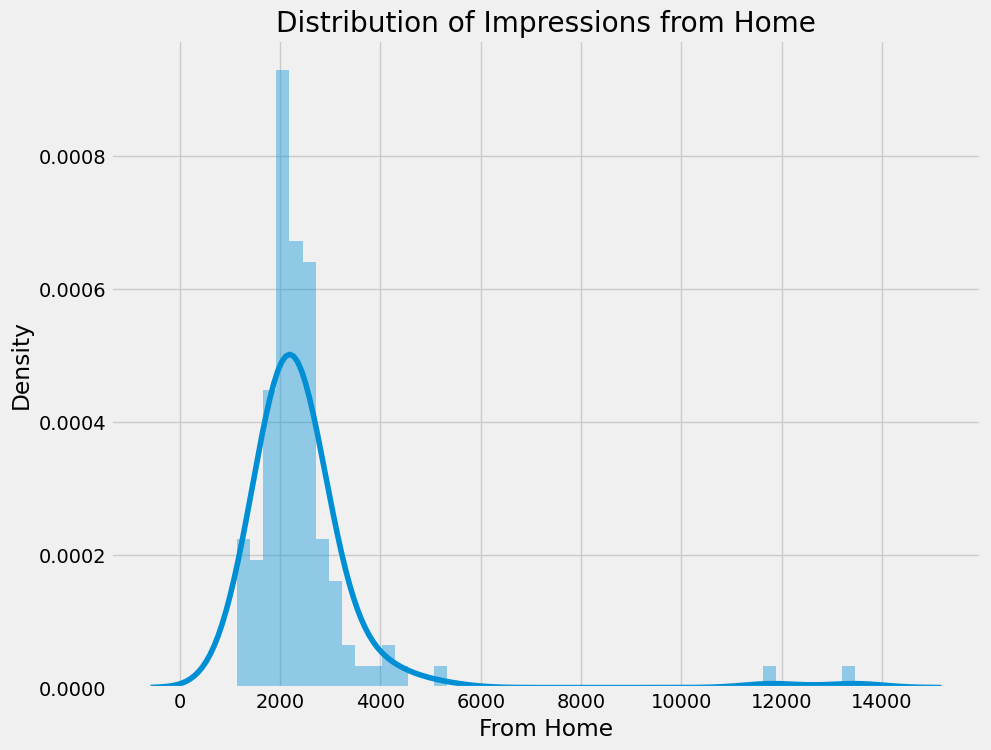

In [12]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home")
sns.distplot(data['From Home'])
plt.show()

The impressions He gets from the home section on Instagram shows how much his posts reach his followers. Looking at the impressions from home, It's hard to reach all his followers daily. Now, let's look at the distribution of the impressions that he received from hashtags.

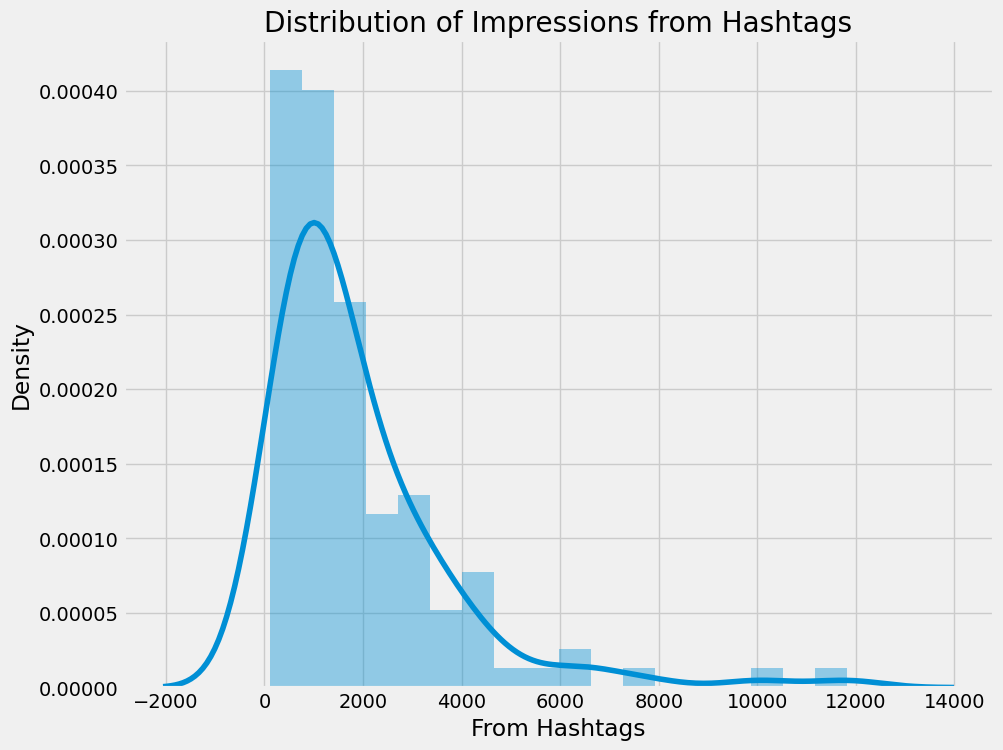

In [15]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtags impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags. Now, let's look at the distribution of impressions that he has received from the explore section of Instagram.

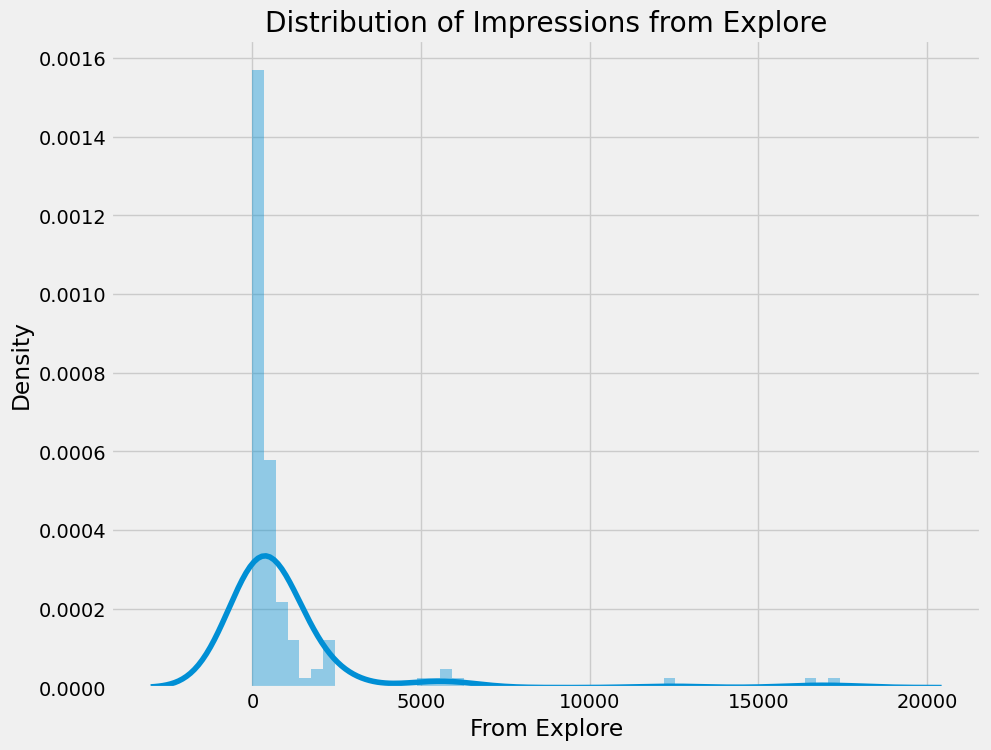

In [16]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(data['From Explore'])
plt.show()

The explore section of Instagram is the recommendation system of the social network. It recommends posts to the user based on their preferences and interests. By looking at the impressions that he has received from the explore section, he can say that Instagram doesn't recommend our posts much to the users. Some posts have received a good reach from the explore section, but it's still very low compared to the reach he receive from hashtags.<br><br>
Now, let's have a look at the percentage of impressions he get fromvarious sources on Instagram.

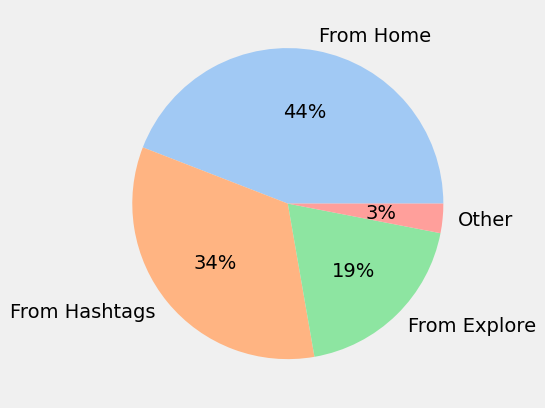

In [19]:
home=data['From Home'].sum()
hashtags=data['From Hashtags'].sum()
explore=data['From Explore'].sum()
other=data['From Other'].sum()

labels=['From Home', 'From Hashtags', 'From Explore', 'Other']
values=[home, hashtags, explore, other]
palette_color=sns.color_palette('pastel')

plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

As we can see, 44 percent of the reach is from my followers, 34 percent is from hashtags, 19 percent is from the explore section, an 3 percent is fromother sources.

## Analyzing Content
Now, let's analyze the content of my instagram posts. The dataset has two columns, namely caption and hashtags, which will help us understand the kind of content he post on Instagram.<br><br>
Let's create wordclouds of the caption column to look at the most used words in the caption of his Instagram posts.

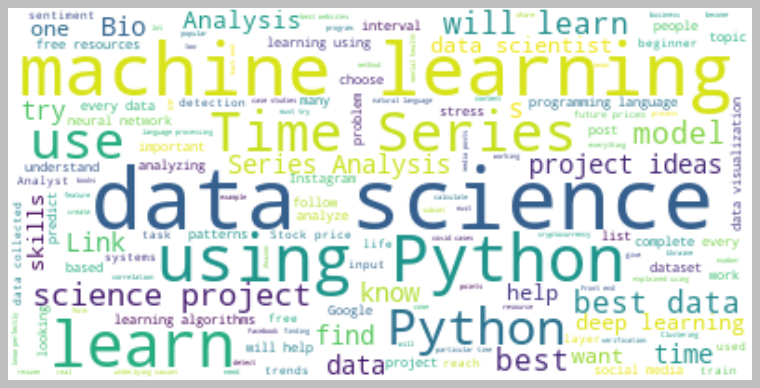

In [20]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now, let's create a wordcloud of the hashtags column to look at the most used hashtags in his Instagram posts.

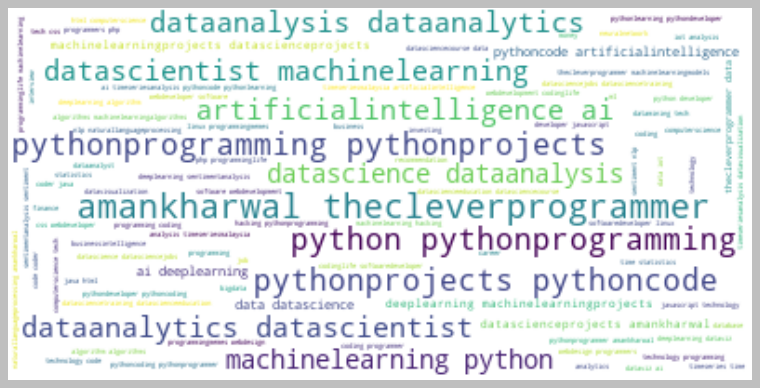

In [24]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Analyzing Relationships
Now, let's analyzw relationships to find the most important factor of our Instagram reach. It will also help us understanding how the Instagram algorith works.

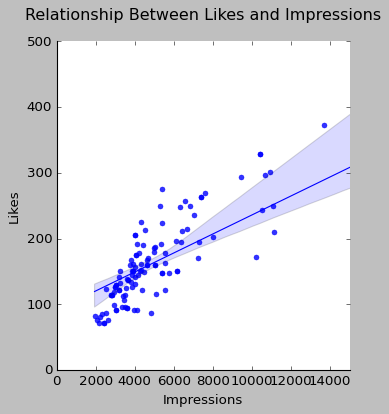

In [25]:
sns.lmplot(data=data, x="Impressions", y="Likes", fit_reg=True, scatter_kws={"s":20}, line_kws={"lw":1})
ax=plt.gca()
ax.set_title("Relationship Between Likes and Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 500)
plt.show()

There is a linear relationship between the number of likes and the reach he got on Instagram. Now, let's see relationship between the number of comments and the number of impressions on his Instagram posts.

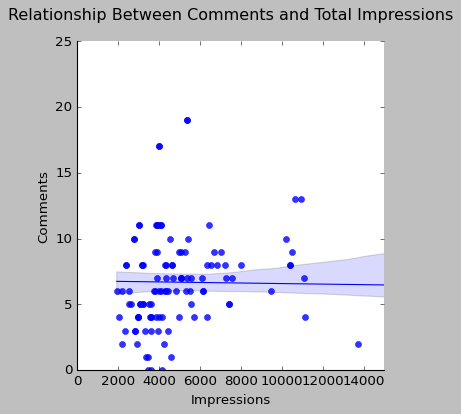

In [26]:
sns.lmplot(data=data, x="Impressions", y="Comments", fit_reg=True, scatter_kws={"s":30}, line_kws={"lw":1})
ax=plt.gca()
ax.set_title("Relationship Between Comments and Total Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 25)
plt.show()

It looks like the number of comments we get on a post doesn't affect it's reach. Now, let's have a look at the relationship between the number of shares and the number of impressions.

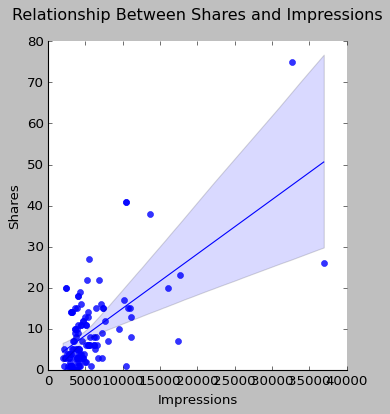

In [27]:
sns.lmplot(data=data, x="Impressions", y="Shares", fit_reg=True, scatter_kws={"s":30}, line_kws={"lw":1})
ax=plt.gca()
ax.set_title("Relationship Between Shares and Impressions", pad=20)
plt.ylim(0, 80)
plt.xlim(0, 40000)
plt.show()

A more number of shares will result in a higher reach, but shares don't affect the reach of a post as much as likes do. Now, let's have a look at the relationship between the number of saves and the number of impressions.

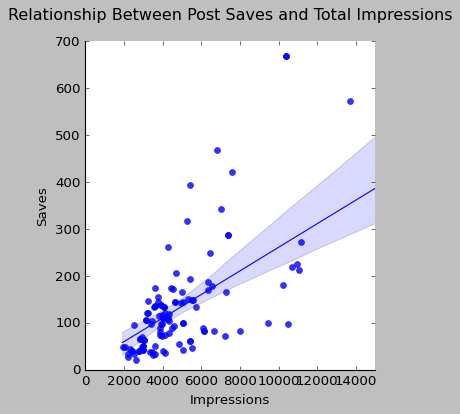

In [28]:
sns.lmplot(data=data, x="Impressions", y="Saves", fit_reg=True, scatter_kws={"s":30}, line_kws={"lw":1})
ax=plt.gca()
ax.set_title("Relationship Between Post Saves and Total Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 700)
plt.show()

There is a linear relationship between the number of times his post is saved and the reach of his Instagram post.Now let's have a look  at the correlation of all the columns with the impressions column.

In [31]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


So we can say that more likes and saves will help ypu get more reach on Instagram. The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

### Analyzing Conversion Rate
In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you canuse to calculate conversion rate is (Follow/Provile Visits)*100. Now, let's have a look at the conversation rate of his Instagram account.

In [32]:
conversion_rate = (data['Follows'].sum()/data['Profile Visits'].sum())*100
print(conversion_rate)

41.00265604249668


So the conversation rate of his Instagram account is 41% which sounds like a very good conversation rate. Let's have a look at the relationship between the total profile visits and the number of followers gained from all profile visits.

Text(0.5, 1.0, 'Relationship Between Profile Visits and Followers Gained')

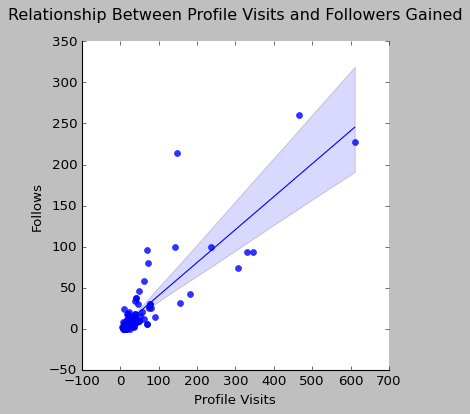

In [33]:
sns.lmplot(data=data, x='Profile Visits', y='Follows', fit_reg=True, scatter_kws={"s":30}, line_kws={"lw":1})
ax=plt.gca()
ax.set_title("Relationship Between Profile Visits and Followers Gained", pad=20)

The relationship between profile visits and followers gained is also linear.

### Instagram Reach Prediction Model
Now in this section, I will train a ML model to predict the reacj of an Instagram post. Let's split the data into training and test sets before training the model.

In [34]:
X = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data['Impressions'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now here's is how we can train a ML model to predict the reach of an Instagram post using Python.

In [35]:
model=PassiveAggressiveRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.726989930779659

Now let's predict the reach of an Instagram post by giving inputs to the ML model.

In [36]:
# Features = [['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]

features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9617.55194671])